## $\color{green}{\text{GMD Figure 2}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr

### <font color=blue> List of **Modules** and **Data** to be used </font>

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_IP_GMD_names_Modules_Data/mod-submod-data_Bob_amarel_4_Fig2.txt')
df

,Component,Module,sub_Module,Data_File
0,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_globalsl.nc
1,Glaciers,emulandice,glaciers,emuglaciers.emulandice.glaciers_globalsl.nc
2,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc
3,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_globalsl.nc
4,GrIS,bamber19,icesheets,bamber19.bamber19.icesheets_GIS_globalsl.nc
5,AIS,ipccar5,icesheets,ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
6,AIS,emulandice,AIS,emuAIS.emulandice.AIS_globalsl.nc
7,AIS,larmip,AIS,larmip.larmip.AIS_globalsl.nc
8,AIS,deconto21,AIS,deconto21.deconto21.AIS_AIS_globalsl.nc
9,AIS,bamber19,icesheets,bamber19.bamber19.icesheets_AIS_globalsl.nc


#### $\color{blue}{\text{Extract .nc data \& Find Percentiles}}$

In [3]:
EXPDATE     = 221217
modNO       = df.index.values;   # Number of datasets Module outputs
SCENARIO    = ['ssp126','ssp585'];        # SCENARIO    = ['ssp126', 'ssp245', 'ssp585'];  
yrBREAK     = 2100 #emulandice has no values beyond this point

#
# Temp DF to store all .nc O/P.      
df_TEMP      = []
#        
for val in modNO:
    for scenario in SCENARIO: 
        MODULE = df.loc[val].at['Module'];     SUB_MODULE = df.loc[val].at['sub_Module']; COMP = df["Component"][val]
        # Skip if data is absent.
        if df.loc[val].at['Data_File'] == 'XXX':
           continue 
        #
        # Pick the data files & Import nc file to dataframe. 
        dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/coupling.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        dataFILE    = 'coupling.{arg1}.'.format(arg1=scenario) + df["Data_File"][val]
        d_nc        = xr.open_dataset(dataFOLDER + dataFILE)
        d_nc
        #
        # Percentile calculation.
        percentList = [50, 5, 17, 83, 95]
        #
        for yy in d_nc["years"].values:
            if yy > yrBREAK:
                continue
            else:
                # Find year index to pick SLC value
                Yind = np.where(d_nc["years"].values == yy)[0][0]
                GMSL = d_nc["sea_level_change"][:,Yind,:].values
                #
                # Find Percentile ranges.
                pcntle = np.percentile(GMSL[:], percentList );    pcntle = np.around(pcntle,2)
                #
                TEMP = [COMP,MODULE,SUB_MODULE, scenario, yy, ] + pcntle.tolist()
                df_TEMP.append( TEMP )
df_ptile = pd.DataFrame( df_TEMP, columns=['Component','Module','sub_Module', 'SSP', 'Year', ] + [ f'col_{x}' for xi, x in enumerate( percentList )] )
df_ptile

,Component,Module,sub_Module,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,Glaciers,ipccar5,glaciers,ssp126,2020,21.0,15.0,17.0,24.00,26.00
1,Glaciers,ipccar5,glaciers,ssp126,2030,30.0,20.0,23.0,36.00,40.00
2,Glaciers,ipccar5,glaciers,ssp126,2040,39.0,24.0,30.0,50.00,56.00
3,Glaciers,ipccar5,glaciers,ssp126,2050,49.0,29.0,37.0,63.00,72.00
4,Glaciers,ipccar5,glaciers,ssp126,2060,58.0,33.0,44.0,76.00,88.00
...,...,...,...,...,...,...,...,...,...,...
193,TE,tlm,sterodynamics,ssp585,2060,124.0,91.0,105.0,148.00,170.00
194,TE,tlm,sterodynamics,ssp585,2070,159.0,117.0,135.0,191.00,220.00
195,TE,tlm,sterodynamics,ssp585,2080,198.0,145.0,167.0,239.17,275.00
196,TE,tlm,sterodynamics,ssp585,2090,241.0,176.0,203.0,291.00,336.05


## Plot: GMSL contribution from Icesheets, Glaciers and TE

#### Global Def

In [4]:
# Colors updated to match updated SPM colors
color_GrIS      = np.array([0, 173,207])/255
color_AIS       = np.array([23  ,60 ,  102])/255
color_Glaciers  = np.array([247 ,148,  32])/255
color_TE        = np.array([231 ,29 ,  37])/255
color_ssp585    = np.array([149 ,27 ,  30])/255
#
# Workflow Components.
wf1e = ['GrIS-emulandice', 'AIS-emulandice', 'Glaciers-emulandice', 'TE-tlm']
wf1f = ['GrIS-FittedISMIP', 'AIS-ipccar5', 'Glaciers-ipccar5-GMIP2', 'TE-tlm']
wf2e = ['GrIS-emulandice', 'AIS-larmip', 'Glaciers-emulandice','TE-tlm']
wf2f = ['GrIS-FittedISMIP', 'AIS-larmip', 'Glaciers-ipccar5-GMIP2','TE-tlm']
wf3e = ['GrIS-emulandice', 'AIS-deconto21', 'Glaciers-emulandice','TE-tlm']
wf3f = ['GrIS-FittedISMIP', 'AIS-deconto21', 'Glaciers-ipccar5-GMIP2','TE-tlm']
wf4  = ['GrIS-bamber19', 'AIS-bamber19', 'Glaciers-ipccar5-GMIP2','TE-tlm']
WORKFLO = ["wf1e","wf1f","wf2e","wf2f","wf3e","wf3f","wf4"]

### Plot figure 

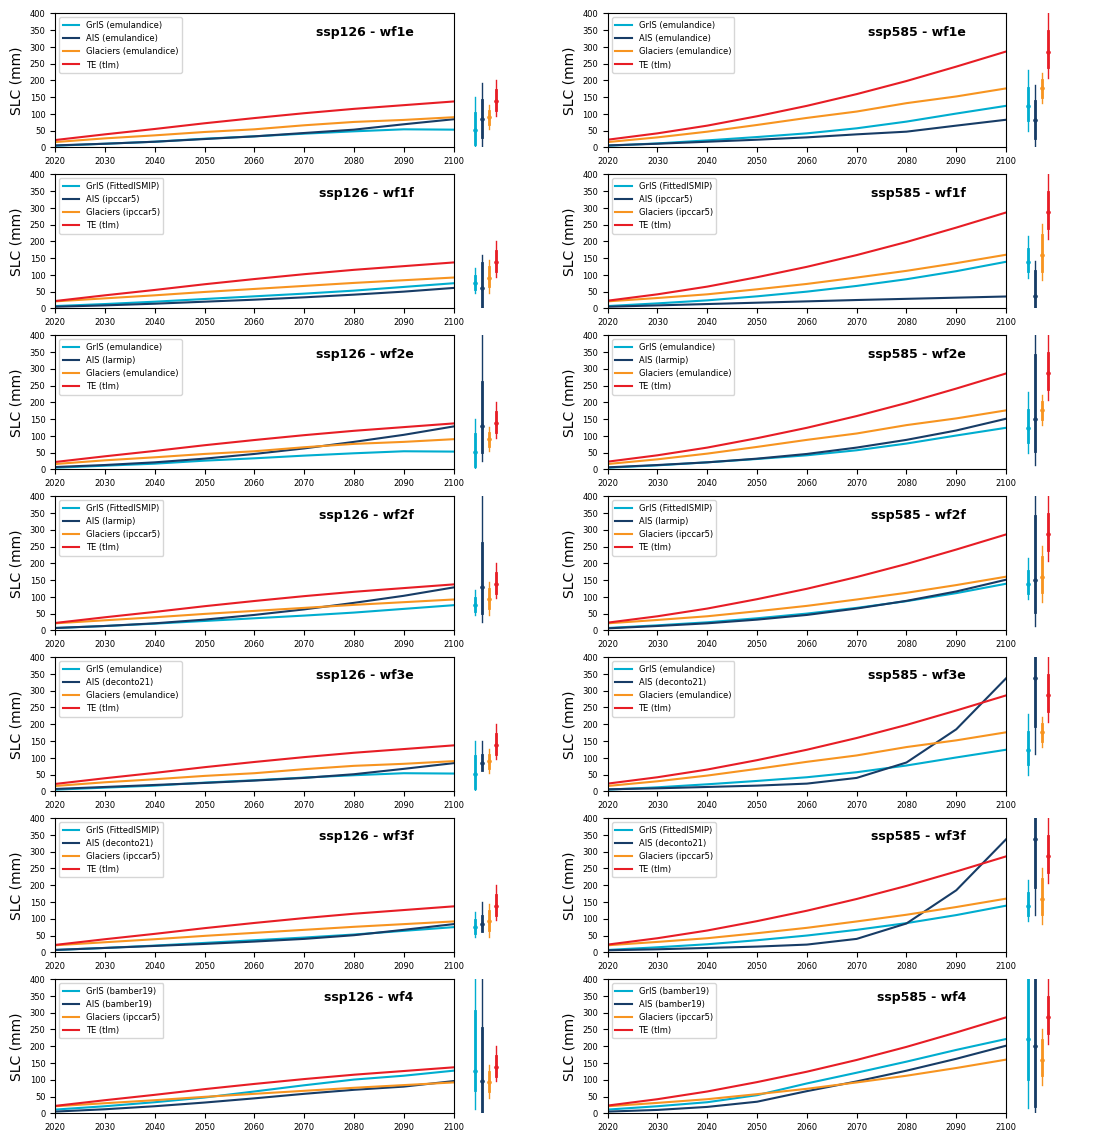

In [16]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(35,40), 'figure.dpi':100})
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(7, 5)
grid01 = grid[1].subgridspec(7, 5)
#
# Axis Spec.
xlim    = [2020,2100]
ylim    = [0 , 400]
xlim1   = [.1,2]
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
COMPONENT   = df_ptile.loc[:,"Component"].unique()
MODULE      = df_ptile.loc[:,"Module"].unique()
#
# Subplot Axis.
ax1_wf1e = plt.subplot(grid00[0, :4]); ax2_wf1e = plt.subplot(grid00[0, 4]);
ax1_wf1f = plt.subplot(grid00[1, :4]); ax2_wf1f = plt.subplot(grid00[1, 4]);
ax1_wf2e = plt.subplot(grid00[2, :4]); ax2_wf2e = plt.subplot(grid00[2, 4]);
ax1_wf2f = plt.subplot(grid00[3, :4]); ax2_wf2f = plt.subplot(grid00[3, 4]);
ax1_wf3e = plt.subplot(grid00[4, :4]); ax2_wf3e = plt.subplot(grid00[4, 4]);
ax1_wf3f = plt.subplot(grid00[5, :4]); ax2_wf3f = plt.subplot(grid00[5, 4]);
ax1_wf4  = plt.subplot(grid00[6, :4]); ax2_wf4  = plt.subplot(grid00[6, 4]);
#
ax3_wf1e = plt.subplot(grid01[0, :4]); ax4_wf1e = plt.subplot(grid01[0, 4]);
ax3_wf1f = plt.subplot(grid01[1, :4]); ax4_wf1f = plt.subplot(grid01[1, 4]);
ax3_wf2e = plt.subplot(grid01[2, :4]); ax4_wf2e = plt.subplot(grid01[2, 4]);
ax3_wf2f = plt.subplot(grid01[3, :4]); ax4_wf2f = plt.subplot(grid01[3, 4]);
ax3_wf3e = plt.subplot(grid01[4, :4]); ax4_wf3e = plt.subplot(grid01[4, 4]);
ax3_wf3f = plt.subplot(grid01[5, :4]); ax4_wf3f = plt.subplot(grid01[5, 4]);
ax3_wf4  = plt.subplot(grid01[6, :4]); ax4_wf4  = plt.subplot(grid01[6, 4]);


#
# ss= "ssp585" 
for ss in SSP: # Loop through each SSP
    for ww in WORKFLO:
        # Select subplot axis based on workflow
        if ss == 'ssp126': 
            ax1 = eval(f'ax1_{ww}');    ax2 = eval(f'ax2_{ww}')
        elif ss == 'ssp585':
            ax1 = eval(f'ax3_{ww}');    ax2 = eval(f'ax4_{ww}')
        # X axis for the Right (Bar) Plot.
        XAX2 = np.array([[.2,.2]]) 
        #
        # Plot Left 
        # Within a single sub-plot, Loop over individual WF components.
        for WFcomp in np.arange(len(eval(ww))):                 # Index of elements within each workflow (e.g. GrIS-emulandice)
            CoMpOnEnT   = (eval(ww)[WFcomp]).split('-')[0]      # e.g. GrIS
            MoDuLe      = (eval(ww)[WFcomp]).split('-')[1]      # e.g. emulandice
            Yax1        = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe)),"col_50" ] #Glacier
            ax1.plot(XAX1, Yax1, label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'))
            # Plot Right
            Yax2_1 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
            Yax2_2 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
            Yax2_3 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
            #
            ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=1)
            ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = f'{CoMpOnEnT} ({MoDuLe})', color = eval(f'color_{CoMpOnEnT}'),linewidth=2)
            ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{CoMpOnEnT}'),ms = 2,mfc='none')
            XAX2 = XAX2+.15
            #
        ax1.tick_params(axis='both', labelsize=6)
        ax1.legend(loc='upper left',prop={'size': 6}); ax1.set_xlim(xlim); ax1.set_ylim(ylim)
        ax1.set_ylabel("SLC (mm)"); #ax1.grid()
        ax1.text(.9, .91, ss+' - '+ww, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=9,transform=ax1.transAxes)
        ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
# plt.suptitle('GMD Fig 2: GMSL projections for {one}'.format(one=ss),y=0.91)
# plt.supxlabel('common x label'); plt.supylabel('common y label')
plt.show()